# K Nearest Neighbors
## Classified data from a company

Here, classified data set from a company is given. The feature column names are hidden but the data and the target classes are known.

dataset = 'Classified Data'

KNN is implemented to create a model that directly predicts a class for a new data point based off of the features.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Getting the Data

In [5]:
# load the data
df = pd.read_csv('Classified Data', index_col=0)

In [7]:
# print dataframe head
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 133.8 KB


In [24]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Standardizing the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

The purpose here is to standardize all the features to the smae scale.

#### Stardardizing everything to the same scale

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# creating the object
scaler = StandardScaler()

In [17]:
# rescaling everything in the dataframe except the TARGET CLASS (because that is what is to be predicted)
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
# using the scaler object to do the transformation
# transform method performs the standarization by centering and scaling
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [19]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [20]:
# using that scaled features to recreate the dataframe
df_feat = pd.DataFrame(data=scaled_features, columns=df.columns[:-1])  # The last column of df must not be added because it's not a feature

In [21]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Now the data is in a standard scale or standarized version. It is ready to be put into the Machine Learning algorithm KNN, which really depends on the distance between each feature.

## Train - Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# X = features, y = labeled data
X = df_feat
y = df['TARGET CLASS']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## K-Nearest Neighbors model implementation

In [38]:
# importing KNearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# instantiating the model and setting the neighbors equal to 1
knn = KNeighborsClassifier(n_neighbors=1)

In [40]:
# fitting/training the data to the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [41]:
# grabbing some predictions
predictions = knn.predict(X_test)

## Evaluating the model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# creating the classification report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [44]:
# creating the confusion matrix
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


### Choosing the correct K Value by using the elbow method

using elbow method to pick a good K Value:

1) Creating an error rate list to see which of the k values have the lowest error rate by iterating through different models with different k values

In [45]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    
    # this is the average error rate:
    # --> average (i.e. mean) where the predictions are not equal to the actual test values)
    error_rate.append(np.mean(prediction_i != y_test))

In [46]:
# printing the error rate list
error_rate

[0.076666666666666661,
 0.089999999999999997,
 0.050000000000000003,
 0.070000000000000007,
 0.056666666666666664,
 0.050000000000000003,
 0.066666666666666666,
 0.059999999999999998,
 0.050000000000000003,
 0.056666666666666664,
 0.053333333333333337,
 0.046666666666666669,
 0.050000000000000003,
 0.056666666666666664,
 0.056666666666666664,
 0.050000000000000003,
 0.050000000000000003,
 0.046666666666666669,
 0.050000000000000003,
 0.053333333333333337,
 0.050000000000000003,
 0.050000000000000003,
 0.063333333333333339,
 0.056666666666666664,
 0.056666666666666664,
 0.050000000000000003,
 0.050000000000000003,
 0.046666666666666669,
 0.059999999999999998,
 0.050000000000000003,
 0.056666666666666664,
 0.046666666666666669,
 0.053333333333333337,
 0.043333333333333335,
 0.046666666666666669,
 0.043333333333333335,
 0.046666666666666669,
 0.043333333333333335,
 0.050000000000000003]

2) Figuring the results of the error rate list for different k values in KNN models

Text(0,0.5,'error rate')

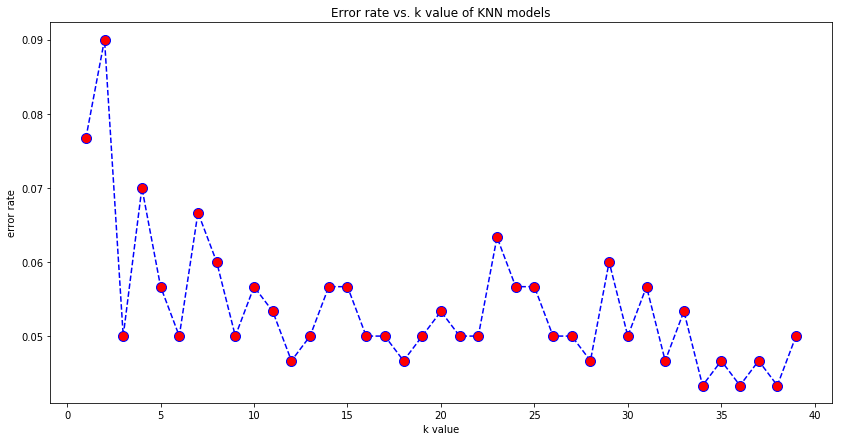

In [47]:
plt.figure(figsize=(14,7))
plt.plot(range(1,40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error rate vs. k value of KNN models')
plt.xlabel('k value')
plt.ylabel('error rate')

At values where k is 34, 36, 38, the error rate has the smallest value, but picking up a such a high number for k is not usual in KNN models. Thus, a 'good' value for k is around the middle of the error rate list where one of the lowsest error rates is as a result. It is a preferred way not to have a so large k value because the algorithm performance then becomes slower. Here, k=17 has the lowest error rate around that area. So, below the KNN model is implemented with **k=17**:

#### Running the model with the best k value:

In [49]:
# KNN model implementation --> k=17
k = 17
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# model evaluation
print('Classification report:')
print(classification_report(y_test, predictions))
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

Classification report:
             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300


Confusion Matrix
[[153   6]
 [  9 132]]
